# COGS 108 - Final Project 

# Overview

Our final project explores the relationship between income, density of liquor stores, and the DUI rates of a neighborhood. We seek to find which of the two factors has a stronger influence, if at all, on DUI rates. Our analysis includes data from 4 different sets that were cleaned and statistically analyzed with linear regressions, OLS tests, and t-tests. 

# Names

- Ankur Gupta
- Aditya Sampath
- Pedro Talancon
- Koodrut Panesar

# Group Members IDs

- A13877512
- A13441492
- A14400378
- A13561263

# Research Question

Does the average income and/or density of liquor-selling businesses in a San Diego zip code influence the amount of DUI tickets given in the area? Which factor has a stronger correlation to DUI rates?

## Background and Prior Work

With San Diego having 4 big colleges, in addition to a vibrant and well-spread out night life, tailgaiting, partying, drinking, and going out are some of the San Deigo communities favorite activites. With ride-share applications like Lyft and Uber, getting to and from an event safely is easier now more than its ever been. However, there are still stories in the news about accidents caused by drunk drivers. A quick search for "DUI accidents San Deigo 2019" pulls up the following tragic head-lines: "Driver accused of fleeing hit-and-run crash with beer in hand", "Woman seriously hurt in crash with suspected drunk driver", and "DUI driver crashes into house in Vista", all of which are dated within 3 weeks of eachother. Clearly, drunk drivers on the road are still taking lives and is an issue that needs to be addressed. 

One of our group members noticed a higher density of liquor stores within certain lower income regions, another member recalled an anecdote about drunks getting kicked out of a bar at 2 AM (last call to buy alcohol in California for the night, so most bars/clubs close), and getting stright in their cars to drive home, every night! This brought up the question of whether the amount of liquor-selling businesses had any correlation with DUIs, or if lower income regions had an influence as well. We were certainly intrigued. 

Despite the ease of use and access to ride-sharing apps, DUI-related accidents in the U.S. take, on average, 1 life ever 50 minutes, and costs the nation $201.1 billion dollars every year[1]. It has been shown that the amount of people consuming alcohol, depends on the proximity to availability of alcohol[2]. Bars, clubs, resturaunts have a higher density of drunk people around them. Research has shown that people of color are more likely to be pulled over by a cop relative to a white person[3]. Factors like age, ethnicity, and car type, all influence a cops decision to pull someone over, thus more people get pulled over in lower-income neighborhood because those areas tend to be more racially and ethnically diverse[4]. We wanted to see if factors such as those mentioned above had a significant influence on the DUI ticket rates of an area. 

References (include links):
1. https://www.rehabspot.com/alcohol/effects-of-alcohol-abuse/drunk-driving/
2. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3896999/
3. https://openpolicing.stanford.edu/findings/
4. https://www.ncbi.nlm.nih.gov/pubmed/30993512

# Hypothesis


We have three hypotheses to answer the two parts of our research question.

1. We hypothesize that median_income in a zip code has a negative correlation with DUI rate in that zip code and that the density of liquor-selling businesses in a zip code has a positive correlation with DUI rate.
2. We hypothesize that liquor store density has a stronger correlation to the DUI rates of a neighborhood. 
    - Since DUI rates of a neighborhood would be more dependent on the amount of people drinking and driving in the vicinity, areas with more bars, clubs, or restaurants (all which have lots of intoxicated people) would likely be the more correlated factor to DUI rates. “Nicer”, i.e. richer, neighborhoods are usually thought to be quiet and to have lower crime rates, presumably leading to lower DUI rates in higher income neighborhoods. 
3.  We hypothesize that there is a statistically significant relationship that can be found in liquor store density influencing DUI rates in neighbors, and a statistically significant relationship can be found between median zip code income and DUI rate.

# Dataset(s)

1. Name: SDPublicCrimeData112019.txt
    - Description: All crimes documented in the last 180 days in San Diego. We are interested in the CM_LEGEND (only the DUI from the column), and the respective ZipCodes
    - Number of observations: 63806 entries 
    - Columns: CM_LEGEND, agency, Charge_Description_Orig, activityDate, BLOCK_ADDRESS, ZipCode, community 
    - Link: https://www.sandag.org/index.asp?classid=14&subclassid=21&projectid=446&fuseaction=projects.detail
2. Name: zip_pop.csv
    - Description: population per zipcode. We are only interested in the zip codes of the greater San Diego region
    - Number of observations: 33092 entries 
    - Columns: zip code and population of that zip code 
    - Link: 2010 Census data from COGS108 Fall'19 Assignment 3 
3. Name: zip_income.csv
    - Description: Median income per zip code. We were only interested in ‘GEO.id2’ and ‘HC03_ EST_VC02’, which were renamed to ‘zip’ and ‘median_income’.
    - Number of observations: 1775 Entries
    - Columns: Many observations related to income statistics per zip code based off tax returns, but we only use three: zip code, median_income per zip code, and median_income_moe per zip code
    - Link: https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?src=bkmk
4. Name: ABC_Licenses.csv
    - Description: All businesses that own Alcoholic Beverage Licenses in San Diego 
    - Number of observations: 9737 entries
    - Columns: Lic_type, Lic_No, Lic_App, Status, Iss_Date, Exp_Date, Master, Term, GeoCode,  Name, Site_Addr1, Site_Addr2, Site_City, Site_State, Site_Zip, DBA_Name, Site_Cnty, Site_Tract, POINT_X, POINT_Y 
    - Link: https://hub.arcgis.com/datasets/6b6a0fe71f3f44b8b80f71151ae40de6_0/data?geometry=-118.474%2C32.196%2C-114.970%2C33.808 

# Setup

In [1]:
# Imports 
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# Data Cleaning

Import the 4 data sets into pandas dataframes

In [2]:
crime_df = pd.read_csv('SDPublicCrimeData112019.txt')
zip_df = pd.read_csv('zip_pop.csv')
income_df = pd.read_csv('zip_income.csv')
liquor_stores_df = pd.read_csv('ABC_Licenses.csv')

liquor_stores_df: keep name, status, and zip 
    1. Check that they’re all either 5 or 10 digits to make sure they’re all valid
    2. Drop the last 4 digits of the zip code if its a 9 digit zip code  
    3. Convert zips to floats

In [3]:
liquor_stores_df = liquor_stores_df[['Status', 'DBA_Name', 'Site_ZIP']]
liquor_stores_df = liquor_stores_df[liquor_stores_df['Status'] == 'ACTIVE']
liquor_stores_df.columns = ['Status', 'Name', 'zip']

In [4]:
for zip_code in liquor_stores_df['zip']:
    if len(zip_code) != 5 and len(zip_code) != 10:
        print(zip_code)

In [5]:
liquor_stores_df['zip'] = liquor_stores_df['zip'].str[:5]
liquor_stores_df['zip'] = liquor_stores_df['zip'].astype(float)

income_df: keep zip, median income
    1. Remove all rows that lack data or are not an int 
    2. Remove all other columns as they’re not necessary for our analysis 
    3. Convert appropriate columns to floats 

In [6]:
income_df = income_df[['GEO.id2', 'HC03_EST_VC02', 'HC03_MOE_VC02']]
income_df.columns = ['zip', 'median_income', 'median_income_moe']

In [7]:
income_df = income_df.drop(income_df[income_df['median_income_moe'] == '**'].index)
income_df = income_df.drop(income_df[income_df['median_income_moe'] == '***'].index)
income_df = income_df.drop(income_df.index[0])
income_df = income_df[['zip', 'median_income']]

In [8]:
income_df['zip'] = income_df['zip'].astype(float)
income_df['median_income'] = income_df['median_income'].astype(float)

crime_df: keep only the rows whose CM_LEGEND is DUI, drop all other columns  
    1. First checked to see if there were variations of ‘DUI’ such as ‘driving under the influence’, etc. 
    2. Drop entries that didn’t have a valid zip code (e.g. Nan)
    3. Drop activityDate, BLOCK_ADDRESS, community due to the Safe Harbor Method 
    4. Drop agency because its not needed for our analysis 
    5. Rename columns to easier names 


In [9]:
crime_df.CM_LEGEND.unique()

array(['MOTOR VEHICLE THEFT', 'BURGLARY', 'THEFT/LARCENY', 'ASSAULT',
       'ROBBERY', 'VANDALISM', 'DRUGS/ALCOHOL VIOLATIONS', 'WEAPONS',
       'DUI', 'FRAUD', 'VEHICLE BREAK-IN/THEFT', 'SEX CRIMES', 'ARSON',
       'HOMICIDE'], dtype=object)

In [10]:
crime_df = crime_df[crime_df['CM_LEGEND']=='DUI']

In [11]:
crime_df["ZipCode"].unique()

array([91911., 92024., 91910., 91913., 91915., 92064., 92114., 92009.,
       92109., 92118., 92075., 92083., 92008., 91941., 92027., 92084.,
       92025., 92111., 92103., 92078., 91932., 92010., 92069., 92123.,
       91942., 91950., 92110., 92065., 92102., 91914., 92126., 92081.,
       92011., 92056., 91901.,    nan, 92117., 92120., 92054., 92105.,
       92113., 20650., 92154., 92057., 92029., 92116., 92101., 92058.,
       92026., 92130., 92173., 92139., 92124., 92107., 92121., 92104.,
       92106., 92115., 92108., 92128., 92071., 92131., 92037., 92129.,
       92122., 92100., 92182., 92021., 92007., 92127., 92020., 92014.,
       92140., 92019., 91978., 91951., 91945., 92155., 92040., 91977.,
       91902., 92003., 92119., 92028., 90284., 92145.])

In [12]:
assert(sum(np.isnan(crime_df["ZipCode"].unique())) == 1)

In [13]:
crime_df = crime_df.dropna(subset=['ZipCode'])

In [14]:
assert(sum(np.isnan(crime_df["ZipCode"].unique())) == 0)

In [15]:
crime_df.head(10)

,CM_LEGEND,agency,Charge_Description_Orig,activityDate,BLOCK_ADDRESS,ZipCode,community
27,DUI,CHULA VISTA,DUI ALC/0.08 PERCENT (M),7/27/2019 2:56:25,400 E BLOCK PALOMAR STREET,91911.0,CHULA VISTA
41,DUI,SHERIFF,DUI ALCOHOL (M),10/3/2019 23:37:00,GLASGOW AVENUE & LIVERPOOL DRIVE,92024.0,ENCINITAS
68,DUI,CHULA VISTA,DUI ALC/0.08 PERCENT (M),8/12/2019 1:06:00,300 BLOCK 04TH AVENUE,91910.0,CHULA VISTA
86,DUI,CHULA VISTA,DUI ALCOHOL (M),8/15/2019 12:43:00,600 BLOCK BROADWAY,91910.0,CHULA VISTA
102,DUI,CHULA VISTA,DUI ALC/0.08 PERCENT (M),8/3/2019 5:05:06,SANTA VENETIAST & WINDCHIME AVENUE,91913.0,NaN
103,DUI,CHULA VISTA,DUI ALCOHOL (M),8/4/2019 8:15:00,LA MEDIA ROAD & E PALOMAR STREET,91915.0,CHULA VISTA
120,DUI,SHERIFF,DUI ALCOHOL (M),7/29/2019 20:07:00,13500 BLOCK KENTFIELD DRIVE,92064.0,POWAY
155,DUI,CHULA VISTA,DUI ALCOHOL (M),9/7/2019 1:06:00,0 BLOCK J STREET ( 200 BLOCK ),91910.0,NaN
156,DUI,CHULA VISTA,DUI ALC/0.08 PERCENT (M),9/8/2019 0:56:00,PASEO ENTRADA & PASEO LADERA,91910.0,CHULA VISTA
157,DUI,CHULA VISTA,DUI ALC/0.08 PERCENT (M),9/7/2019 22:55:00,BONITA ROAD & PLAZA BONITA ROAD,91910.0,CHULA VISTA


In [16]:
crime_df = crime_df.drop(['activityDate', 'BLOCK_ADDRESS', 'community'], axis = 1)

In [17]:
crime_df = crime_df.drop(['agency'], axis = 1)

In [18]:
crime_df.columns = ['crime', 'charge_description', 'zip']

income_df: 
1. Check for any invalid / outlying zip codes: Dropped 20650 zip code because it was in maryland - it had 3 DUI points with that zip and after looking at the 3 entries, they looked like duplicates of each other

In [19]:
print(len(crime_df["zip"].unique()))
print(crime_df["zip"].unique())
print(crime_df[crime_df["zip"] == 20650])

85
[91911. 92024. 91910. 91913. 91915. 92064. 92114. 92009. 92109. 92118.
 92075. 92083. 92008. 91941. 92027. 92084. 92025. 92111. 92103. 92078.
 91932. 92010. 92069. 92123. 91942. 91950. 92110. 92065. 92102. 91914.
 92126. 92081. 92011. 92056. 91901. 92117. 92120. 92054. 92105. 92113.
 20650. 92154. 92057. 92029. 92116. 92101. 92058. 92026. 92130. 92173.
 92139. 92124. 92107. 92121. 92104. 92106. 92115. 92108. 92128. 92071.
 92131. 92037. 92129. 92122. 92100. 92182. 92021. 92007. 92127. 92020.
 92014. 92140. 92019. 91978. 91951. 91945. 92155. 92040. 91977. 91902.
 92003. 92119. 92028. 90284. 92145.]
      crime charge_description      zip
1968    DUI    DUI ALCOHOL (M)  20650.0
2108    DUI    DUI ALCOHOL (M)  20650.0
10001   DUI    DUI ALCOHOL (M)  20650.0


In [20]:
crime_df = crime_df.drop(crime_df[crime_df["zip"] == 20650].index)

In [21]:
assert(len(crime_df[crime_df["zip"] == 20650]) == 0)

Merge the 4 df’s, dropping any columns that don’t have all 4 values (crime, zip, population, or median income) appropriately filled out - always do a left merge
1. Merge crime with population 
2. Zip codes 92100, 92182, 91951, and 90284 were dropped as their 2010 census information wasn’t collected 
3. Merge income with cumalative_df 
4. Zip codes 92140 and 92155 were dropped because they’re military bases thus lack an average income
5. Merge liquor_stores with cumulative_df 
6. Zip code 92145 was not dropped even though it was a military base with no liquor stores 
7. Make sure each zip code is only once in each dataframe 

In [22]:
cumulative_df = pd.merge(crime_df, zip_df, on='zip', how='left')

In [23]:
cumulative_df[cumulative_df['population'].isnull() == True]

,crime,charge_description,zip,population
469,DUI,DUI ALC/0.08 PERCENT (M),92100.0,NaN
515,DUI,DUI ALC/0.08 PERCENT (M),92182.0,NaN
830,DUI,DUI ALCOHOL (M),91951.0,NaN
1561,DUI,DUI ALCOHOL (M),90284.0,NaN


In [24]:
cumulative_df = cumulative_df.drop(cumulative_df[cumulative_df["zip"] == 92100].index)
cumulative_df = cumulative_df.drop(cumulative_df[cumulative_df["zip"] == 92182].index)
cumulative_df = cumulative_df.drop(cumulative_df[cumulative_df["zip"] == 91951].index)
cumulative_df = cumulative_df.drop(cumulative_df[cumulative_df["zip"] == 90284].index)

In [25]:
assert(len(cumulative_df[cumulative_df["zip"] == 92100]) == 0)
assert(len(cumulative_df[cumulative_df["zip"] == 92182]) == 0)
assert(len(cumulative_df[cumulative_df["zip"] == 91951]) == 0)
assert(len(cumulative_df[cumulative_df["zip"] == 90284]) == 0)

In [26]:
cumulative_df = pd.merge(cumulative_df, income_df, on='zip', how='left')

In [27]:
cumulative_df[cumulative_df['median_income'].isnull() == True]

,crime,charge_description,zip,population,median_income
699,DUI,DUI ALCOHOL (M),92140.0,3435.0,NaN
1016,DUI,DUI ALCOHOL,92155.0,550.0,NaN
1993,DUI,USE WATERCRAFT WHILE UNDER INFLUENCE OF ALCOHO...,92155.0,550.0,NaN


In [28]:
cumulative_df = cumulative_df.drop(cumulative_df[cumulative_df["zip"] == 92140].index)
cumulative_df = cumulative_df.drop(cumulative_df[cumulative_df["zip"] == 92155].index)

In [29]:
assert(len(cumulative_df[cumulative_df["zip"] == 92140]) == 0)
assert(len(cumulative_df[cumulative_df["zip"] == 92155]) == 0)

In [30]:
unique_crime_zips = cumulative_df['zip']
liquor_zips = set(liquor_stores_df['zip'])
zips_with_no_liquor_stores = set()

for crime_zip in unique_crime_zips:
    if crime_zip not in liquor_zips:
        zips_with_no_liquor_stores.add(crime_zip)

print(zips_with_no_liquor_stores)

{92145.0}


In [31]:
len(cumulative_df['zip'].unique())

78

Create a dataframe that uses the analysis that we derive from the cumulative df
1. Make sure we have each zip code once in the final dataframe.
2. Add the median income for each zip code to each row
3. For each zip code in the final df, calculate the number of liquor stores divided by the population of that zip code. This yields liquor_store_density in each zip code.
4. For each zip code in the final df, calculate the number of DUIs in that zip code divided by the population of that zip code. This yields DUI_rate in each zip code. 

In [32]:
result_df = pd.DataFrame(columns=['zip','median_income','liquor_store_density','DUI_rate'])

In [33]:
all_zips = cumulative_df['zip'].unique()
result_df['zip'] = all_zips

In [34]:
for zip_code in all_zips:
    zip_income = income_df[income_df['zip'] == zip_code]['median_income'].values[0]
    result_df.loc[result_df['zip'] == zip_code, "median_income"] = zip_income

In [35]:
for zip_code in all_zips:
    num_stores_in_zip = liquor_stores_df[liquor_stores_df['zip'] == zip_code]['zip'].count()
    zip_pop = cumulative_df[cumulative_df['zip'] == zip_code].iloc[0]['population']
    density = num_stores_in_zip / zip_pop
    result_df.loc[result_df['zip'] == zip_code, "liquor_store_density"] = density

In [36]:
total_DUIs = 0
for zip_code in all_zips:
    num_DUIs_in_zip = cumulative_df[cumulative_df['zip'] == zip_code]['crime'].count()
    zip_pop = cumulative_df[cumulative_df['zip'] == zip_code].iloc[0]['population']
    
    total_DUIs += num_DUIs_in_zip
    DUI_rate = num_DUIs_in_zip / zip_pop
    result_df.loc[result_df['zip'] == zip_code, "DUI_rate"] = DUI_rate
result_df.head(5)

,zip,median_income,liquor_store_density,DUI_rate
0,91911.0,52274,0.00151809,0.00057832
1,92024.0,103417,0.00415301,0.00144541
2,91910.0,59371,0.00244057,0.000844305
3,91913.0,87440,0.000341705,0.000439335
4,91915.0,106452,0.00174379,0.000283872


In [37]:
assert(total_DUIs == cumulative_df.shape[0])

In [38]:
result_df["liquor_store_density"] = pd.to_numeric(result_df["liquor_store_density"])
result_df["DUI_rate"] = pd.to_numeric(result_df["DUI_rate"])

In [39]:
result_df.head(5)

,zip,median_income,liquor_store_density,DUI_rate
0,91911.0,52274,0.001518,0.000578
1,92024.0,103417,0.004153,0.001445
2,91910.0,59371,0.002441,0.000844
3,91913.0,87440,0.000342,0.000439
4,91915.0,106452,0.001744,0.000284


# Data Exploration

Let's get some basic visualizations: below we have 2 scatter matrices of the cumalative_df and result_df.  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1f8a9210>,
      dtype=object)

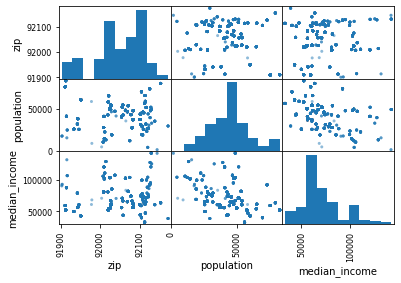

In [40]:
pd.plotting.scatter_matrix(cumulative_df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1f1c6510>,
      dtype=object)

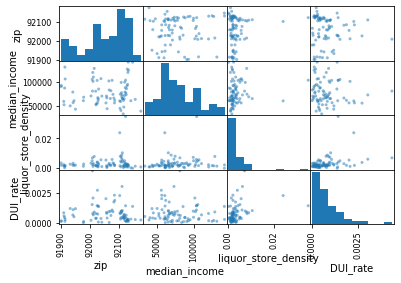

In [41]:
pd.plotting.scatter_matrix(result_df)


Next we have 3 charts to show the distributions of number of zip codes with a certain liquor store density, income, and DUI rate, and explain the statistics and chart values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1ed73690>]],
      dtype=object)

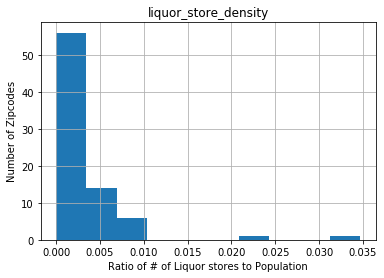

In [42]:
den_hist = result_df.hist(column='liquor_store_density')
for ax in den_hist.flatten():
    ax.set_xlabel("Ratio of # of Liquor stores to Population")
    ax.set_ylabel("Number of Zipcodes")

den_hist

In [43]:
liquor_dist = list(result_df["liquor_store_density"])
median_liquor_density = np.median(liquor_dist)

print("Median", median_liquor_density)
print("Mean", np.mean(liquor_dist))
print("Min", min(liquor_dist))
print("Max", max(liquor_dist))
print("Range", max(liquor_dist) - min(liquor_dist))
result_df[result_df["liquor_store_density"] == max(liquor_dist)]

Median 0.002212094191613473
Mean 0.0035340265892453973
Min 0.0
Max 0.03469729600382867
Range 0.03469729600382867


,zip,median_income,liquor_store_density,DUI_rate
52,92121.0,103953,0.034697,0.001436


This statistical data matches the bar chart we have above for liquor_store_density distribution for the zipcodes. The median seemes to be around .0022, with mean being around .0033. From the chart, we see we have one extreme zipcode with alot of liquor stores! From the code, we see that zipcode is 92121, with a density of .0346, meaning around 35 liquor stores for every 1000 people! This Zipcode is near UCSD around sorrento valley, so it makes sense that ther are alot of liquor stores near a college.

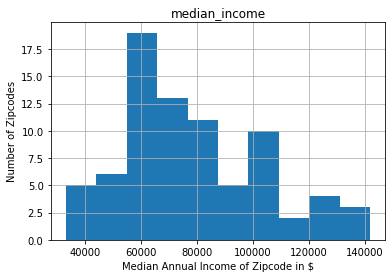

In [44]:
inc_hist = result_df.hist(column='median_income')
for ax in inc_hist.flatten():
    ax.set_xlabel("Median Annual Income of Zipcode in $")
    ax.set_ylabel("Number of Zipcodes")

In [45]:
income_dist = list(result_df["median_income"])
median_zip_income = np.median(income_dist)

print("Median", median_zip_income)
print("Mean", np.mean(income_dist))
print("Min", min(income_dist))
print("Max", max(income_dist))
print("Range", max(income_dist) - min(income_dist))
result_df[result_df["median_income"] == max(income_dist)]

Median 72208.5
Mean 78352.30769230769
Min 33125
Max 141926
Range 108801


,zip,median_income,liquor_store_density,DUI_rate
47,92130.0,141926,0.002227,0.000286


This statistical data matches the bar chart we have above for median_income for the zipcodes. It seems the zipcodes median incomes have an average of around 78k and a median of 72k. The max has a median income of 141,926 dollars! We were curious what this zipcode was, and it happens to be 92130, which is a rich area to the East of Del Mar which makes sense

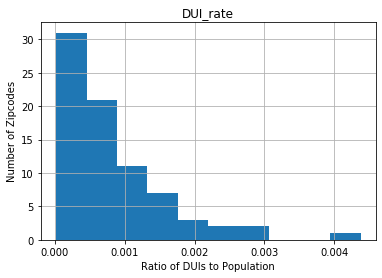

In [46]:
dui_hist = result_df.hist(column='DUI_rate')
for ax in dui_hist.flatten():
    ax.set_xlabel("Ratio of DUIs to Population")
    ax.set_ylabel("Number of Zipcodes")


In [47]:
dui_dist = list(result_df["DUI_rate"])
print("Median", np.median(dui_dist))
print("Mean", np.mean(dui_dist))
print("Min", min(dui_dist))
print("Max", max(dui_dist))
print("Range", max(dui_dist) - min(dui_dist))
result_df[result_df["DUI_rate"] == max(dui_dist)]

Median 0.0006325487850205444
Mean 0.0008192115573141351
Min 1.713267543859649e-05
Max 0.004376288473362509
Range 0.004359155797923913


,zip,median_income,liquor_store_density,DUI_rate
12,92008.0,81073,0.00698,0.004376


This statistical data matches the bar chart we have above for DUI_rate for the zipcodes, Median DUI rate seems to be around .0006 with mean being .0008. Shockingly, the zipcode 92008 of carlsbad has a DUI rate of .004, meaning 10x the average DUI rate for the population compared to rest of SD zipcodes.

# Data Analysis & Results

## Correlation

1. First we looked at correlations between DUI rate and liquor store density and median income
2. Use polyfit to determine the relationship between DUI rate and median income in terms of slope and offset
3. Use polyfit to determine the relationship between DUI rate and liquor store density in terms of slope and offset

In [48]:
result_df.corr()

,zip,median_income,liquor_store_density,DUI_rate
zip,1.000000,0.019662,0.147925,-0.025641
median_income,0.019662,1.000000,0.094757,-0.091820
liquor_store_density,0.147925,0.094757,1.000000,0.327651
DUI_rate,-0.025641,-0.091820,0.327651,1.000000


There is a positive correlation between liquor store density and DUI rate, and a weak negative correlation between DUI rate and median income of a zip code.

In [49]:
a_income, b_income = np.polyfit(result_df['median_income'], result_df['DUI_rate'], 1)

In [50]:
a_income, b_income

(-2.799312114338822e-09, 0.0010385441214236148)

In [51]:
a_density, b_density = np.polyfit(result_df['liquor_store_density'], result_df['DUI_rate'], 1)

In [52]:
a_density, b_density

(0.05286957980441174, 0.0006323690565231124)

In [53]:
pred_income = np.zeros(115)

for i in range(30, 145):
    pred_income[i - 30] = a_income * (i * 1000) + b_income

Scatter plots: 
1. Use polyfit to determine the relationship between DUI rate and median income/liquor store density in terms of slope and offset
2. Predicted DUI rates based off income using polyfit values
3. Plot it: y-axis being DUI rate and the x-axis being median zip code income/liquor store density
4. Use polyfit to determine the relationship between DUI rate and liquor store density/median income in terms of slope and offset
5. Predict DUI rate based off liquor store density/median income using polyfit values
6. Plot it: y-axis being DUI rate and the x-axis being liquor store density/median income in a zip code

In these scatter plots we see every zip-code as a point, plotted according to its liquor store density/median incomee on the x-axis, and its DUI rate on the y-axis. We also include a line that shows the relationship between the two plotted factors.

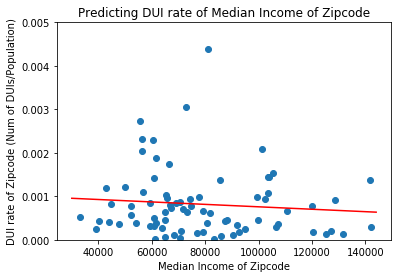

In [54]:
x_income = np.arange(30000, 145000, 1000)

# Limit the y-axis to positive values because there's no negative DUI rate
axes = plt.gca()
axes.set_ylim([0,0.005])

plt.scatter(result_df['median_income'], result_df['DUI_rate'])
plt.title("Predicting DUI rate of Median Income of Zipcode")
plt.xlabel("Median Income of Zipcode")
plt.ylabel("DUI rate of Zipcode (Num of DUIs/Population)")
plt.plot(x_income, pred_income, c='red')

plt.show()

In [55]:
pred_density = np.zeros(36)

for i in range(36):
    pred_density[i] = a_density * (i * 0.001) + b_density

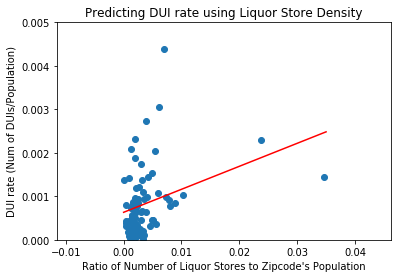

In [56]:
x_density = np.arange(0, 0.036, 0.001)

# Limit the y-axis to positive values because there's no negative DUI rate
axes = plt.gca()
axes.set_ylim([0, 0.005])

plt.scatter(result_df['liquor_store_density'], result_df['DUI_rate'])
plt.title("Predicting DUI rate using Liquor Store Density")
plt.xlabel("Ratio of Number of Liquor Stores to Zipcode's Population")
plt.ylabel("DUI rate (Num of DUIs/Population)")
plt.plot(x_density, pred_density, c='red')

plt.show()

## Significance

After looking at correlations between DUI rate and median income/liquor store density, we wanted to check if either factor was statistically signifcant in determining DUI rate. For the purposes of our analysis, we are using a *0.05 alpha significance threshold*.

1. Create brackets for both liquor store density and median income by splitting both at the median into two separate categories. As a result, we have two groups, low and high, for the median income and liquor store density.
2. For all zip codes in the result_df, classify each zip_code's median_income as RICH or POOR based on whether or not it's higher than the median zip_code income in San Diego. Add this income type-classification to the result_df.
3. For all zip codes in the result_df, classify each zip_code's liquor store density as HIGH or LOW based on whether or not it's higher than the median zip_code liquor story density in San Diego. Add this density type-classification to the result_df.

In [57]:
result_df["income_type"] = ""
result_df["density_type"] = ""

In [58]:
result_df.head(5)

,zip,median_income,liquor_store_density,DUI_rate,income_type,density_type
0,91911.0,52274,0.001518,0.000578,,
1,92024.0,103417,0.004153,0.001445,,
2,91910.0,59371,0.002441,0.000844,,
3,91913.0,87440,0.000342,0.000439,,
4,91915.0,106452,0.001744,0.000284,,


In [59]:
result_zips = result_df['zip'].unique()

In [60]:
for zip_code in result_zips:
    current_zip = result_df[result_df['zip'] == zip_code]
    income = current_zip['median_income'].values[0]
    income_type = ''
    
    if income > median_zip_income:
        income_type = 'RICH'
    else:
        income_type = 'POOR'
    
    result_df.loc[result_df['zip'] == zip_code, "income_type"] = income_type

In [61]:
for zip_code in result_zips:
    current_zip = result_df[result_df['zip'] == zip_code]
    density = current_zip['liquor_store_density'].values[0]
    density_type = ''
    
    if density > median_liquor_density:
        density_type = 'HIGH'
    else:
        density_type = 'LOW'
    
    result_df.loc[result_df['zip'] == zip_code, "density_type"] = density_type

result_df.head(5)

,zip,median_income,liquor_store_density,DUI_rate,income_type,density_type
0,91911.0,52274,0.001518,0.000578,POOR,LOW
1,92024.0,103417,0.004153,0.001445,RICH,HIGH
2,91910.0,59371,0.002441,0.000844,POOR,HIGH
3,91913.0,87440,0.000342,0.000439,RICH,LOW
4,91915.0,106452,0.001744,0.000284,RICH,LOW


1. Get DUI_rates for all zip_codes, grouped by income type.
2. Run a t-test on the DUI rates when separated into the income types.
3. Get DUI_rates for all zip_codes, grouped by liquor store density classification.
4. Run a t-test on the DUI rates when separated into the density types.
5. Create a pivot table to see if there are confounding variables when determining significance.

In [62]:
income_poor = result_df[result_df['income_type'] == 'POOR']['DUI_rate'].values
income_rich = result_df[result_df['income_type'] == 'RICH']['DUI_rate'].values

In [63]:
t_val_income, p_val_income = ttest_ind(income_poor, income_rich)
t_val_income, p_val_income

(0.19465469942537508, 0.8461826866567435)

In [64]:
if p_val_income < 0.05:
    print("There was a significant difference")
else:
    print("There was not a significant difference.")

There was not a significant difference.


In [65]:
density_high = result_df[result_df['density_type'] == 'HIGH']['DUI_rate'].values
density_low = result_df[result_df['density_type'] == 'LOW']['DUI_rate'].values

In [66]:
t_val_density, p_val_density = ttest_ind(density_high, density_low)
t_val_density, p_val_density

(2.426871856331739, 0.017598587993861343)

In [67]:
if p_val_density < 0.05:
    print("There was a significant difference")
else:
    print("There was not a significant difference.")

There was a significant difference


In [68]:
pv = pd.pivot_table(result_df, values=['DUI_rate'], index=['income_type', 'density_type'])
pv

DUI_rate
income_type density_type          
POOR        HIGH          0.001113
            LOW           0.000681
RICH        HIGH          0.000975
            LOW           0.000494

Here, we use OLS (Ordinary Least Squares) Regression to see what variable(s) have the highest impact on DUI rate.

1. Make a model that only compares DUI rate to income type.
2. Make a model that only compares DUI rate to density type.
3. Make a model that only compares DUI rate to income type and density type.

In [69]:
outcome_1, predictors_1 = patsy.dmatrices('DUI_rate ~ income_type', result_df)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

In [70]:
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:               DUI_rate   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                   0.03789
Date:                Thu, 12 Dec 2019   Prob (F-statistic):              0.846
Time:                        01:56:42   Log-Likelihood:                 449.08
No. Observations:                  78   AIC:                            -894.2
Df Residuals:                      76   BIC:                            -889.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0008    

The p-value was 0.846, which means income is not stastically signifcant in causing DUIs.

In [71]:
outcome_2, predictors_2 = patsy.dmatrices('DUI_rate ~ density_type', result_df)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()

In [72]:
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:               DUI_rate   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     5.890
Date:                Thu, 12 Dec 2019   Prob (F-statistic):             0.0176
Time:                        01:56:42   Log-Likelihood:                 451.97
No. Observations:                  78   AIC:                            -899.9
Df Residuals:                      76   BIC:                            -895.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0010    

The p-value was 0.018, which means liquor store density is stastically signifcant in causing DUIs.

In [73]:
outcome_3, predictors_3 = patsy.dmatrices('DUI_rate ~ income_type + density_type', result_df)
mod_3 = sm.OLS(outcome_3, predictors_3)
res_3 = mod_3.fit()

In [74]:
print(res_3.summary())

                            OLS Regression Results                            
Dep. Variable:               DUI_rate   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     3.365
Date:                Thu, 12 Dec 2019   Prob (F-statistic):             0.0398
Time:                        01:56:42   Log-Likelihood:                 452.41
No. Observations:                  78   AIC:                            -898.8
Df Residuals:                      75   BIC:                            -891.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0011    

Here, we do OLS on both variables which show which one is more important when deciding DUI rate. P value is .359 for income type, which shows its not statistically significant, but P value is .012 for density type, which is statistically significant.

# Ethics & Privacy

We followed the Safe Harbor Method to protect people whose information was in the datasets we used. However, we didn’t group the zip codes based on the first 3 digits of the zip because its one of the main groups/factors of analysis and grouping 85 zips into 3-4 groups would make out project analysis quite ineffective. We got clearance for this on piazza. In addition to this, the data we used was not data collected by our group, but from a public, government website which already dropped many of the personal identifiers. Also, the zip code from the DUI list is of where the DUI occurred and not the zipcode of the residence of the offender, so there is less of a chance of someone being recognized from the zip code of the location of a DUI ticket. 

Lower income regions have a bigger density of liquor stores which makes it easier for people who live there to get access to liquor. There is less law enforcement surrounding wealthier communities than there are in lower income communities. Thus, we must consider that it is more likely for people in lower income communities to get caught drinking and driving than the people who live in wealthier communities. Another factor that directly plays a role in the relationship between law-enforcement agencies and an individual is access to resources such as ride-sharing agencies and legal help. Is it okay that wealthier people have a greater, and many times unfair, access to such resources perhaps making it easier to get away with getting a DUI ticket, or not even getting it in the first place? If so, should these differences be accounted for in law-enforcement agencies to facilitate fair and equal policing strategies? 

Our project dives deep into some of the most personal aspects of people's lives. We examine drunk driving rates, income levels, and crime statistics, which people are understandably private about. During our analysis we aimed to restrict the identifying personal information we used and always ask ourselves if we truly needed a specific data point to be able to conduct our analysis. We believe that we used the minimum amount of identifying data needed to conduct the analysis within the scope of our data science question, and we made every possible effort to prevent identification of specific people.

# Conclusion & Discussion

In conclusion, density of liquor stores of a zipcode is statistically significant in predicting DUI rate! More liquor stores per person in a zipcode means more DUIs. While there a small negative correlation between income and DUI rate, it wasn't statistically significant, so we cannot say that income has an influence on causing DUI rates in San Diego zip codes. Our hypothesis accurately predicted that there is a correlation between liquore store density and DUI rates, however we were proven wrong about the influence of income on DUI rates. 

We used Correlation coefficient and scatter plot to see the general trends between both income and number of liquor stores and DUI rates. After that, we used p-value statistics, pivot tables, and OLS regression to see whether these relationships were statistically significant. The OLS regression using both variables showed clearly that while the income might not be statistcally significant in predicting DUI rates, liquor store density most definetely does affect DUI rates, due to our low p-value.

Despite this, our analysis has limitations. We only compared two factors, and there could be other more important factors in causing DUIs that yields both income and liquor store density statistically insignificant. Furthermore, our data is based off DUI arrests, not all incidents of drunk driving in the San Diego area. One could assume that zip-codes with a lower police presence would have fewer DUI arrests but still could have a large drunk driving rate. The we did not analyze the differences in access to resources in higher and lower income neighborhoods, and this difference's influnce on DUI rates, further limiting our analysis.

Despite these limitations, this analysis indicates to both police and the general population that they should be wary of regions with numerous bars and liquor stores, and that police should station additional officers in these regions to catch the most DUIs. In addition to this, we urge our community to look out for your drunk peers getting into cars and to help stop them from putting theirs, and the other people on the roads, lifes at risk. 